
# Comprehenisve Analysis of Online Gaming Behavior Dataset

This notebook provides an in-depth analysis of player behavior in online gaming environments. The dataset includes metrics and demographics related to player behavior, game-specific details, engagement metrics, and a target variable reflecting player retention.

## Dataset Overview

The dataset captures the following features:

- **PlayerID**: Unique identifier for each player.
- **Age**: Age of the player.
- **Gender**: Gender of the player.
- **Location**: Geographic location of the player.
- **GameGenre**: Genre of the game the player is engaged in.
- **PlayTimeHours**: Average hours spent playing per session.
- **InGamePurchases**: Indicates whether the player makes in-game purchases (0 = No, 1 = Yes).
- **GameDifficulty**: Difficulty level of the game.
- **SessionsPerWeek**: Number of gaming sessions per week.
- **AvgSessionDurationMinutes**: Average duration of each gaming session in minutes.
- **PlayerLevel**: Current level of the player in the game.
- **AchievementsUnlocked**: Number of achievements unlocked by the player.
- **EngagementLevel**: Categorized engagement level reflecting player retention ('High', 'Medium', 'Low').

## Objectives

1. Perform exploratory data analysis (EDA) to understand the dataset.
2. Identify key factors influencing player engagement levels.
3. Build predictive models to classify player engagement.
4. Analyze feature importance and provide insights for game design optimization.


In [20]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

file_path = 'data/online_gaming_behavior_dataset.csv'
gaming_data = pd.read_csv(file_path)

gaming_data.head()


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium



## Exploratory Data Analysis (EDA)

### Summary Statistics


In [21]:

gaming_data.describe()


,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000



### Distribution Plots


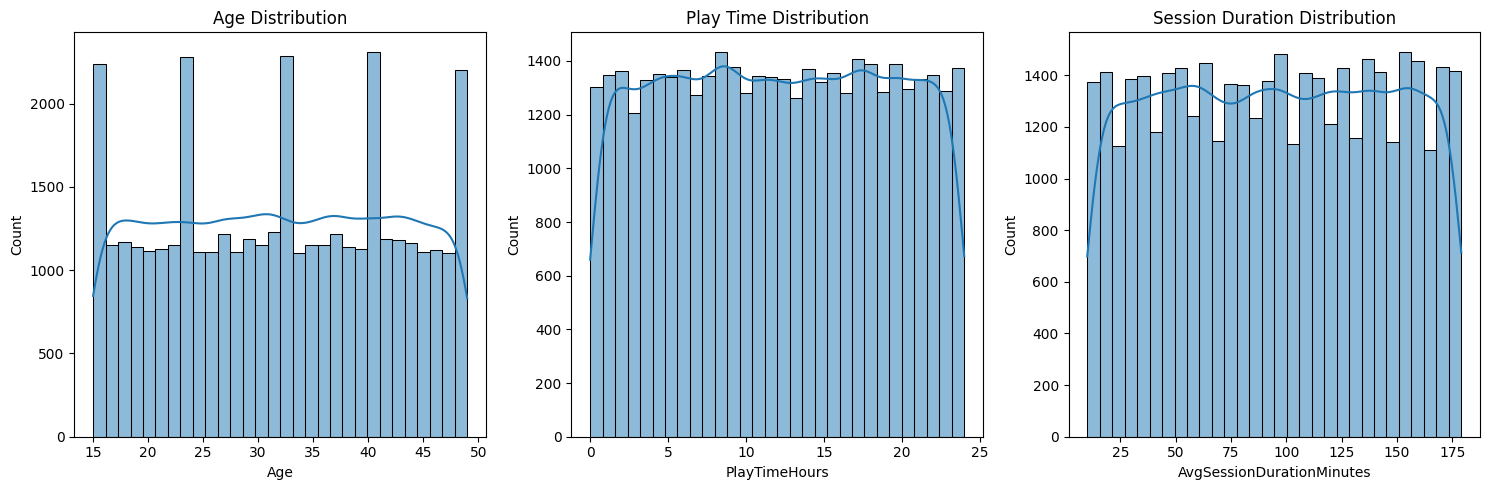

In [22]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(gaming_data['Age'], kde=True, bins=30)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(gaming_data['PlayTimeHours'], kde=True, bins=30)
plt.title('Play Time Distribution')

plt.subplot(1, 3, 3)
sns.histplot(gaming_data['AvgSessionDurationMinutes'], kde=True, bins=30)
plt.title('Session Duration Distribution')

plt.tight_layout()
plt.show()



### Correlation Matrix


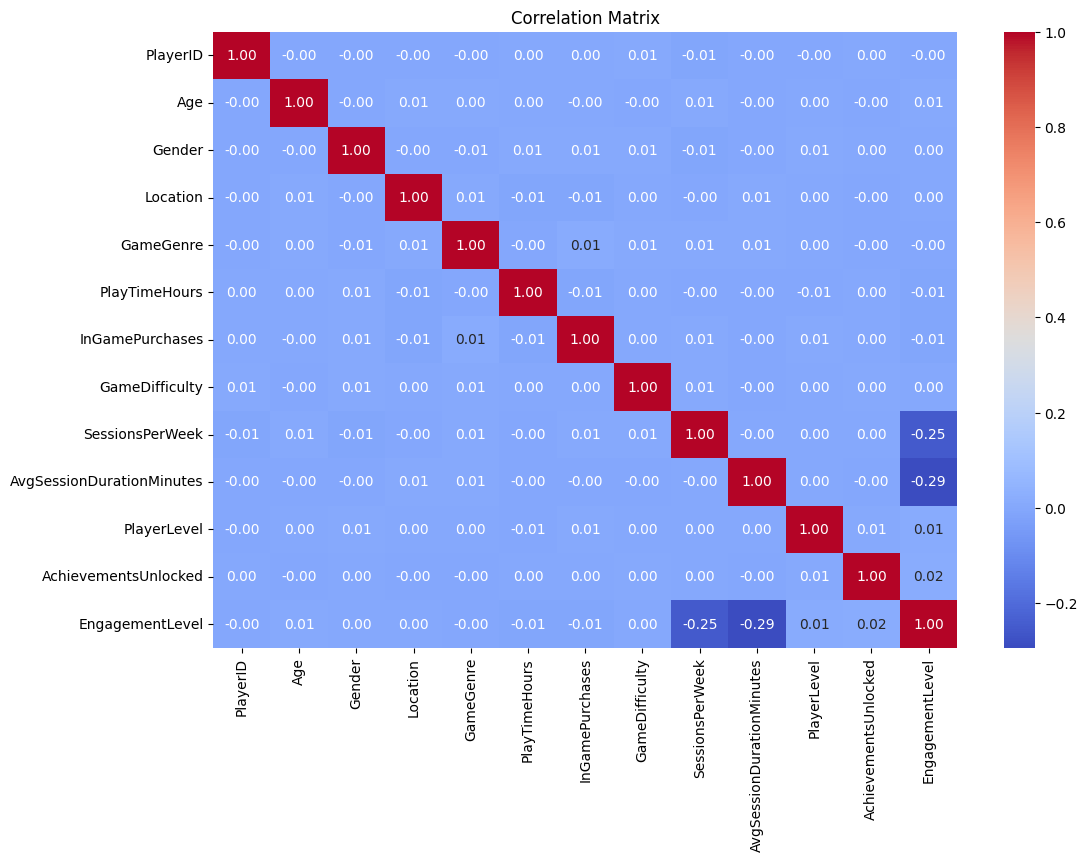

In [23]:
label_encoders = {}
categorical_features = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
for feature in categorical_features:
    le = LabelEncoder()
    gaming_data[feature] = le.fit_transform(gaming_data[feature])
    label_encoders[feature] = le

plt.figure(figsize=(12, 8))
correlation = gaming_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Predictive Modeling

### Data Preprocessing


In [24]:

label_encoders = {}
categorical_features = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
for feature in categorical_features:
    le = LabelEncoder()
    gaming_data[feature] = le.fit_transform(gaming_data[feature])
    label_encoders[feature] = le

scaler = StandardScaler()
numerical_features = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
gaming_data[numerical_features] = scaler.fit_transform(gaming_data[numerical_features])

X = gaming_data.drop(['PlayerID', 'EngagementLevel'], axis=1)
y = gaming_data['EngagementLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



### Random Forest Classifier


Accuracy: 0.9096661393722422
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      3132
           1       0.91      0.88      0.89      3069
           2       0.90      0.95      0.93      5810

    accuracy                           0.91     12011
   macro avg       0.91      0.90      0.90     12011
weighted avg       0.91      0.91      0.91     12011



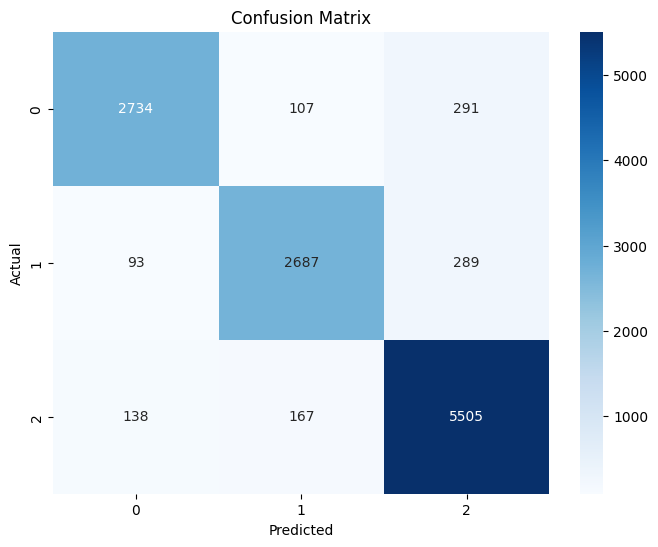

In [25]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['EngagementLevel'].classes_, yticklabels=label_encoders['EngagementLevel'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



### Feature Importance Analysis


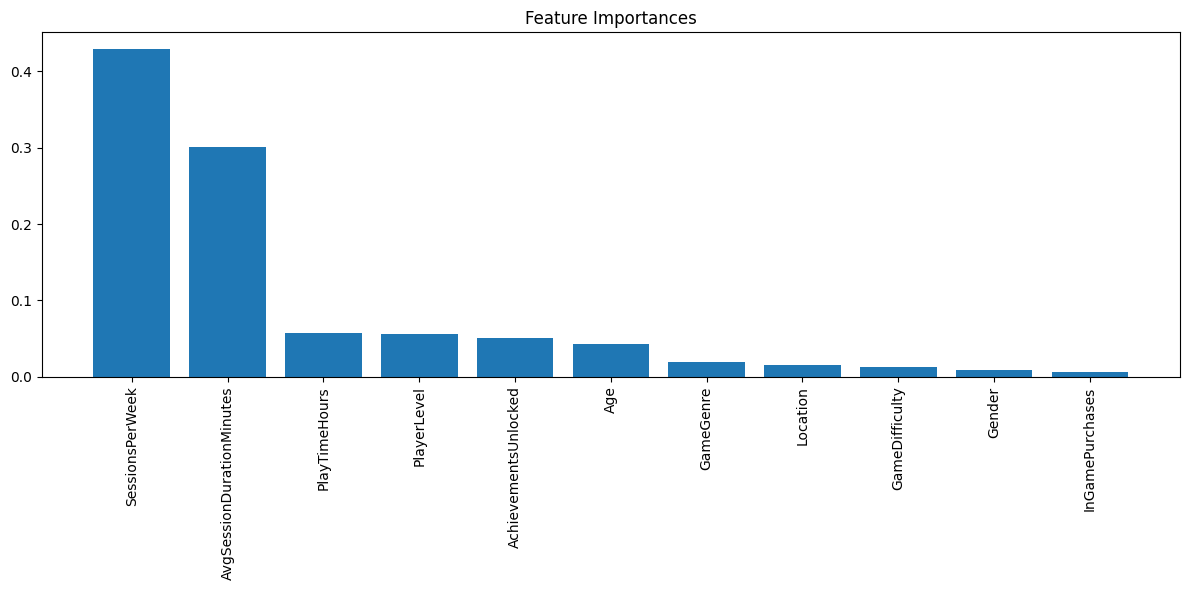

In [26]:
import numpy as np

importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()





#### Hyperparameter Tuning for Random Forest


In [27]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Best Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Random Forest Model Classification Report:")
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Random Forest Model Accuracy: 0.9092498543002248
Best Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      3132
           1       0.91      0.88      0.89      3069
           2       0.90      0.95      0.93      5810

    accuracy                           0.91     12011
   macro avg       0.91      0.90      0.90     12011
weighted avg       0.91      0.91      0.91     12011




#### Model Comparison

Comparison between the performance of different machine learning models including Support Vector Machine (SVM), Gradient Boosting, and Neural Networks.


In [28]:

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Model Accuracy:", accuracy_score(y_test, y_pred_gb))

nn_model = MLPClassifier(max_iter=500)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
print("Neural Network Model Accuracy:", accuracy_score(y_test, y_pred_nn))


SVM Model Accuracy: 0.8947631337940222
Gradient Boosting Model Accuracy: 0.905170260594455
Neural Network Model Accuracy: 0.9083340271417867



#### Cross-Validation



In [29]:

from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Scores for Best Random Forest Model:", cv_scores_rf)
print("Mean Cross-Validation Score for Best Random Forest Model:", cv_scores_rf.mean())

cv_scores_gb = cross_val_score(gb_model, X, y, cv=5)
print("Cross-Validation Scores for Gradient Boosting Model:", cv_scores_gb)
print("Mean Cross-Validation Score for Gradient Boosting Model:", cv_scores_gb.mean())

cv_scores_nn = cross_val_score(nn_model, X, y, cv=5)
print("Cross-Validation Scores for Neural Network Model:", cv_scores_nn)
print("Mean Cross-Validation Score for Neural Network Model:", cv_scores_nn.mean())


Cross-Validation Scores for Best Random Forest Model: [0.91170226 0.91482453 0.91494942 0.91869614 0.90931801]
Mean Cross-Validation Score for Best Random Forest Model: 0.9138980721371673
Cross-Validation Scores for Gradient Boosting Model: [0.90808043 0.91020357 0.91032846 0.91045335 0.90107419]
Mean Cross-Validation Score for Gradient Boosting Model: 0.9080280023528001
Cross-Validation Scores for Neural Network Model: [0.90970401 0.91632322 0.9138254  0.91694767 0.90332251]
Mean Cross-Validation Score for Neural Network Model: 0.9120245615713282



## Summary and Conclusion

### Summary

In this notebook, we performed a comprehensive analysis of the Online Gaming Behavior Dataset. Our analysis included:

1. **Exploratory Data Analysis (EDA)**: We examined the distribution of player demographics and game-specific details, and visualized the correlation between different features.
2. **Predictive Modeling**: We built a Random Forest classifier to predict player engagement levels and evaluated its performance using accuracy and classification reports.
3. **Additional Analysis**:
   - Hyperparameter tuning for the Random Forest model to improve its performance.
   - Comparison of different machine learning models including SVM, Gradient Boosting, and Neural Networks.
   - Cross-validation to ensure the robustness of our models.

### Conclusion

Our analysis revealed that the Random Forest model, after hyperparameter tuning, provided the best performance in predicting player engagement levels. The model's accuracy was further validated through cross-validation. We also explored the importance of various features, which can help in optimizing game design and enhancing player experience.

Future work can involve exploring deeper neural network architectures and incorporating more complex features such as social interactions within the game to further improve predictive accuracy and provide deeper insights into player behavior.
